<a href="https://colab.research.google.com/github/MackenzieRip/DataSci/blob/main/Mackenzie_Ripley_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np                                       
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [4]:
url = "https://docs.google.com/presentation/d/1pzbj4QxQvEVM8-603gIOfdN0i8KGV5STViE5d_xb_CI/edit#slide=id.p" #link to the google slides

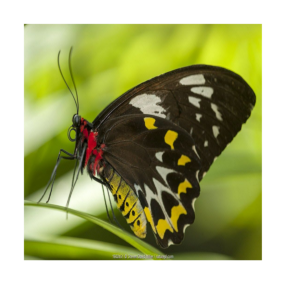

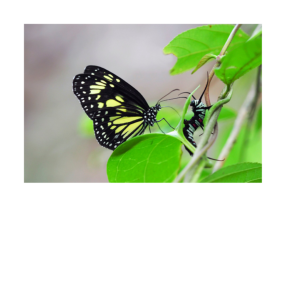

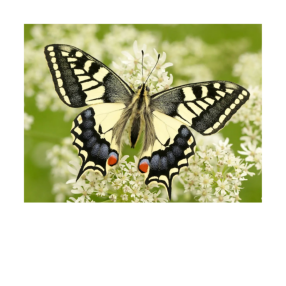

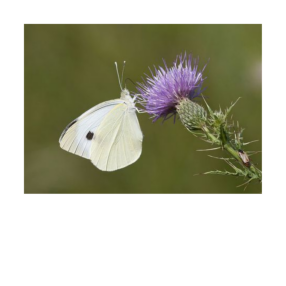

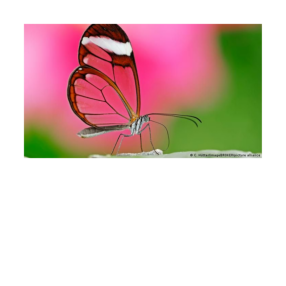

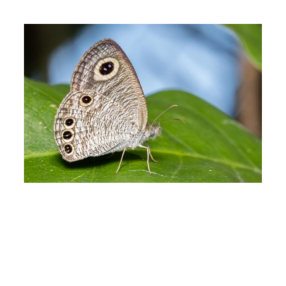

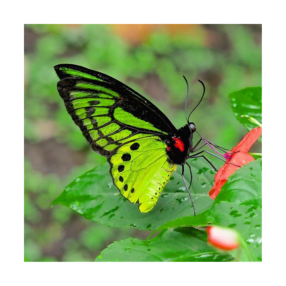

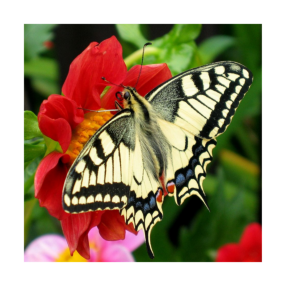

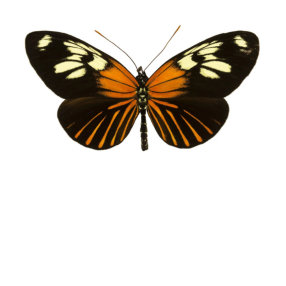

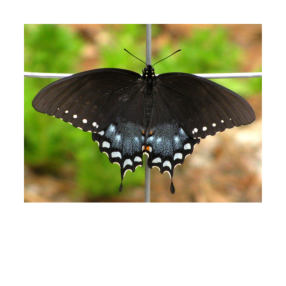

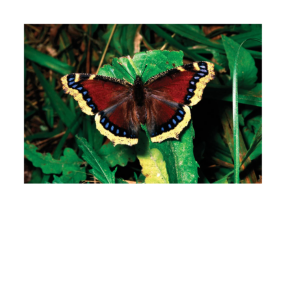

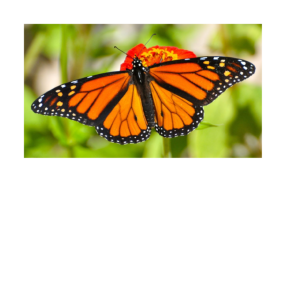

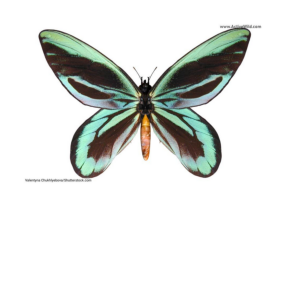

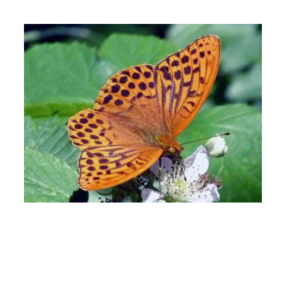

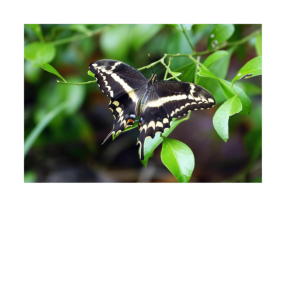

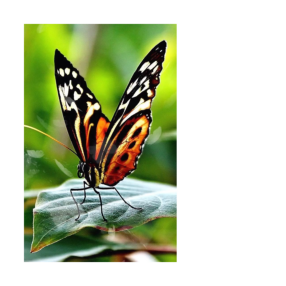

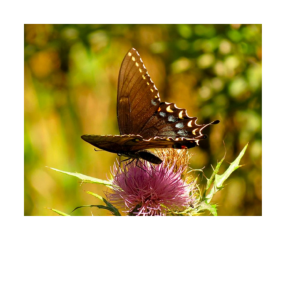

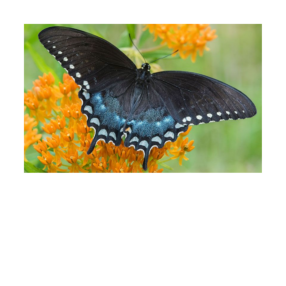

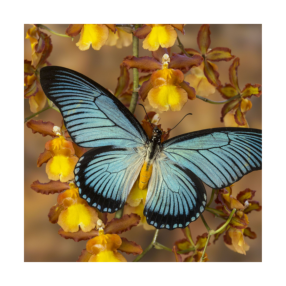

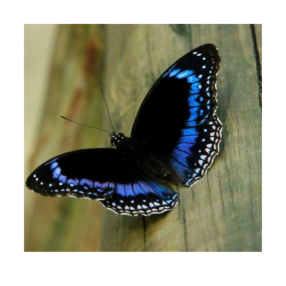

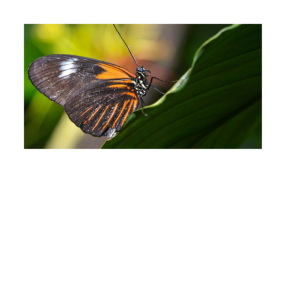

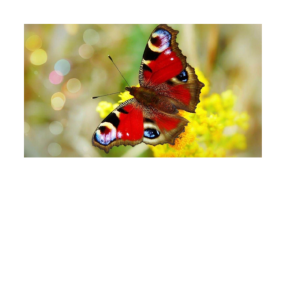

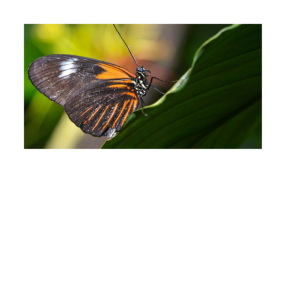

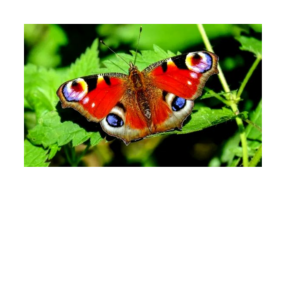

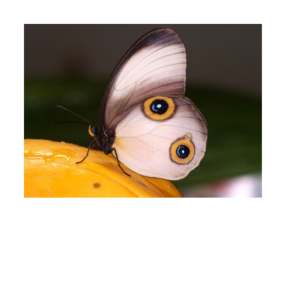

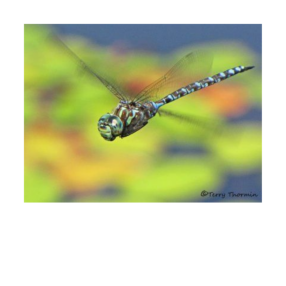

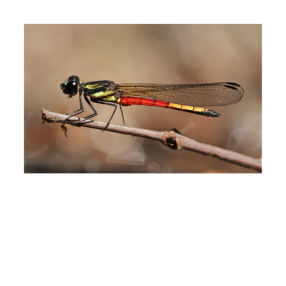

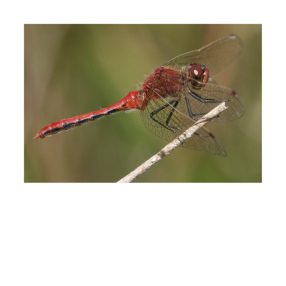

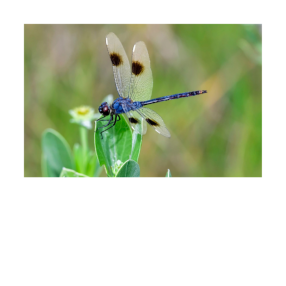

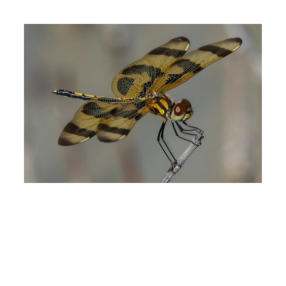

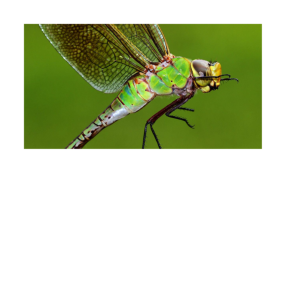

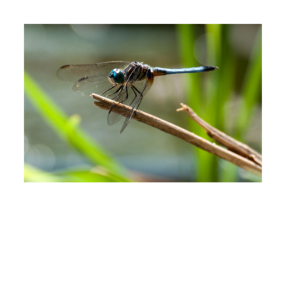

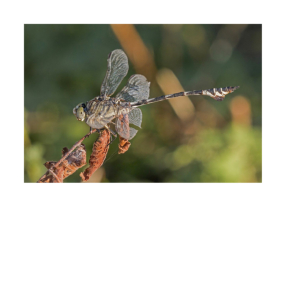

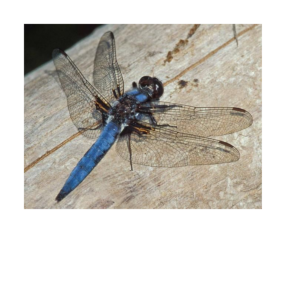

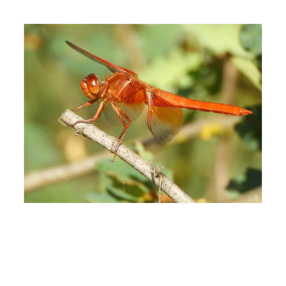

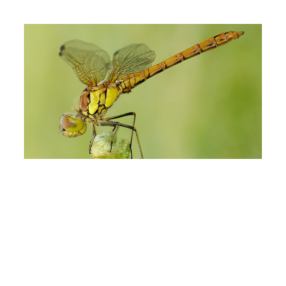

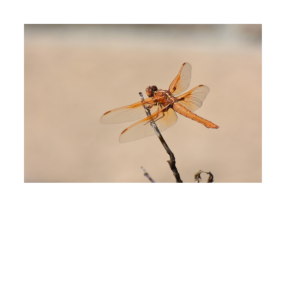

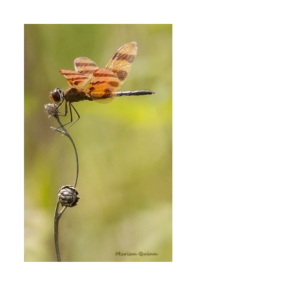

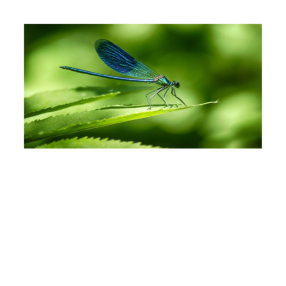

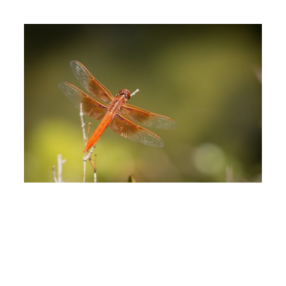

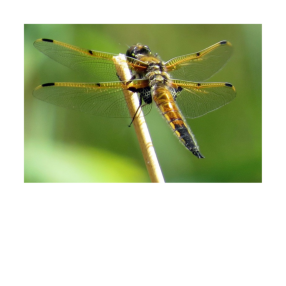

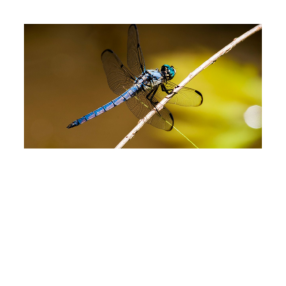

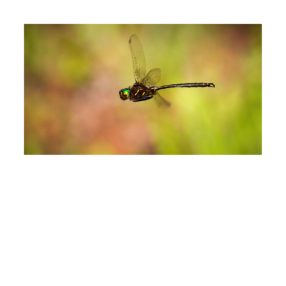

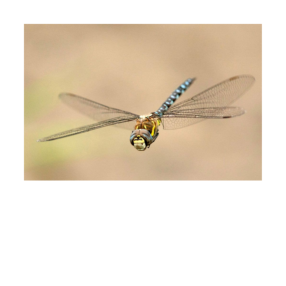

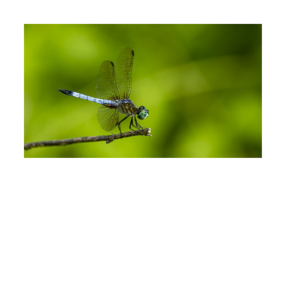

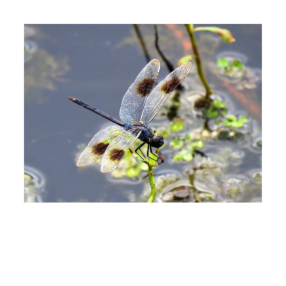

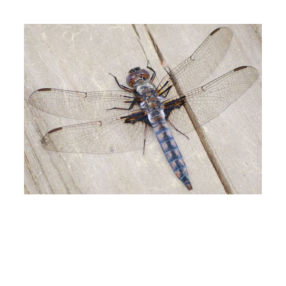

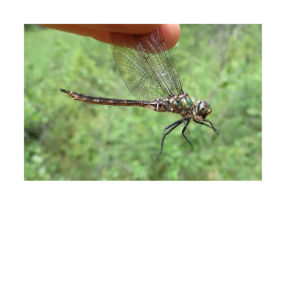

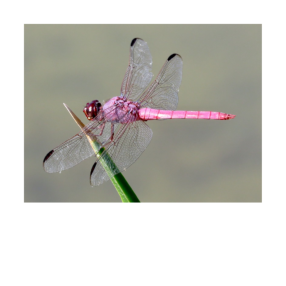

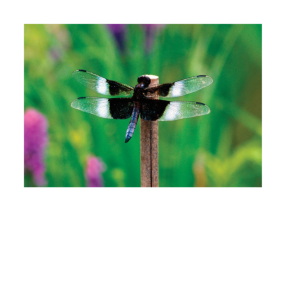

In [5]:
images = []

for image in get_slides(url):        #pulls the images from the google slides into colab

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [6]:
images.shape

torch.Size([50, 3, 224, 224])

In [7]:
model(images)

tensor([[-5.0514, -0.4494, -4.3940,  ..., -5.1907,  3.0451, -1.1092],
        [-3.4345, -3.6981, -4.1786,  ..., -3.0669,  1.4786,  2.2713],
        [-2.8801, -2.4283, -2.7859,  ..., -3.3526,  0.8063, -0.9039],
        ...,
        [-2.5069, -2.4948, -3.6690,  ...,  0.8759,  1.9540,  0.7604],
        [-3.1720, -1.4232, -2.5807,  ..., -3.2148,  1.6499,  2.1870],
        [-3.9269, -0.4744, -4.2694,  ..., -1.3739, -0.0193,  1.9466]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images)

In [9]:
y.shape

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [11]:
for i in list(guesses):
    print(labels[i])          #ai guessing what is in the pictures from the google slides

admiral
hair slide
admiral
cabbage butterfly
hair slide
ringlet, ringlet butterfly
lycaenid, lycaenid butterfly
lacewing, lacewing fly
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
spotted salamander, Ambystoma maculatum
wallet, billfold, notecase, pocketbook
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
hair slide
jaguar, panther, Panthera onca, Felis onca
oboe, hautboy, hautbois
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
lycaenid, lycaenid butterfly
spotted salamander, Ambystoma maculatum
spaghetti squash
admiral
lycaenid, lycaenid butterfly
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
lycaenid, lycaenid butterfly
pool table, billiard table, snooker table
loupe, jeweler's loupe
vine snake
mousetrap
dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk
Pomeranian
hair slide
dragonfly, darning needle, devil's darning needle, sewing needle, snake

In [12]:
Y = np.zeros(50,)
Y[25:] = 1

In [13]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy() 

In [15]:
X.shape

(50, 1000)

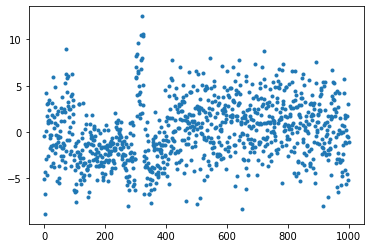

In [16]:
plt.plot(X[0],'.')      #plotting the possibilites of the label answers

In [17]:
X[0]

array([-5.05137825e+00, -4.49376941e-01, -4.39396000e+00, -6.74046803e+00,
       -8.87779331e+00,  4.18948603e+00, -2.98175716e+00,  1.36209905e-01,
        1.72141075e+00, -4.70473003e+00,  2.96852827e+00,  3.08027697e+00,
        1.01123857e+00, -2.57841492e+00,  1.21790230e+00,  1.33078837e+00,
        3.47167540e+00,  2.32219958e+00, -6.37019157e-01, -3.60928833e-01,
       -1.78541327e+00,  1.04325533e+00, -3.67907429e+00, -1.57200885e+00,
       -3.07713211e-01,  3.15175366e+00,  1.83290672e+00, -1.97937465e+00,
        5.91543198e+00, -3.36408710e+00, -1.43568623e+00,  3.75047058e-01,
        1.61417317e+00, -3.83300591e+00, -2.27207565e+00,  1.00956678e+00,
        4.91154766e+00,  2.70282650e+00, -2.98304617e-01, -1.66978800e+00,
       -1.32059646e+00,  1.88242817e+00, -5.29271507e+00,  7.67477334e-01,
       -6.07925296e-01, -1.11391044e+00, -3.94243151e-01,  2.24171758e+00,
       -4.98744059e+00, -5.56171179e+00, -3.67111778e+00, -1.54783487e+00,
       -6.00928426e-01,  

In [18]:
np.argmax(X[0])

321

In [19]:
labels[948] #label example

'Granny Smith'

In [20]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [21]:
for i in top_ten:          #top 10 most likely labels for slides
    print(labels[i])

admiral
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
lacewing, lacewing fly
lycaenid, lycaenid butterfly
fly
black and gold garden spider, Argiope aurantia
pinwheel
leaf beetle, chrysomelid
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
ringlet, ringlet butterfly


In [22]:
labels   #all possible labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 13.,  63., 167., 245., 227., 156.,  89.,  31.,   5.,   4.]),
 array([-8.877793 , -6.738422 , -4.599051 , -2.4596796, -0.3203085,
         1.8190627,  3.9584339,  6.097805 ,  8.237176 , 10.376548 ,
        12.515919 ], dtype=float32),
 <a list of 10 Patch objects>)

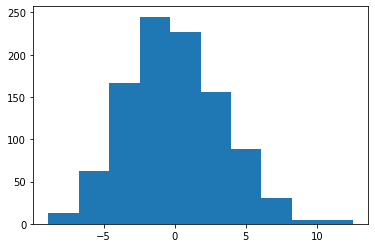

In [23]:
plt.hist(X[0])

In [24]:
X = GPU_data(X)
Y = GPU_data(Y)

In [25]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [26]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [27]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [28]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [29]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [30]:
X.shape

torch.Size([50, 1000])

In [31]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [32]:
def model(x,w):

    return x@w[0]

In [33]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [35]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

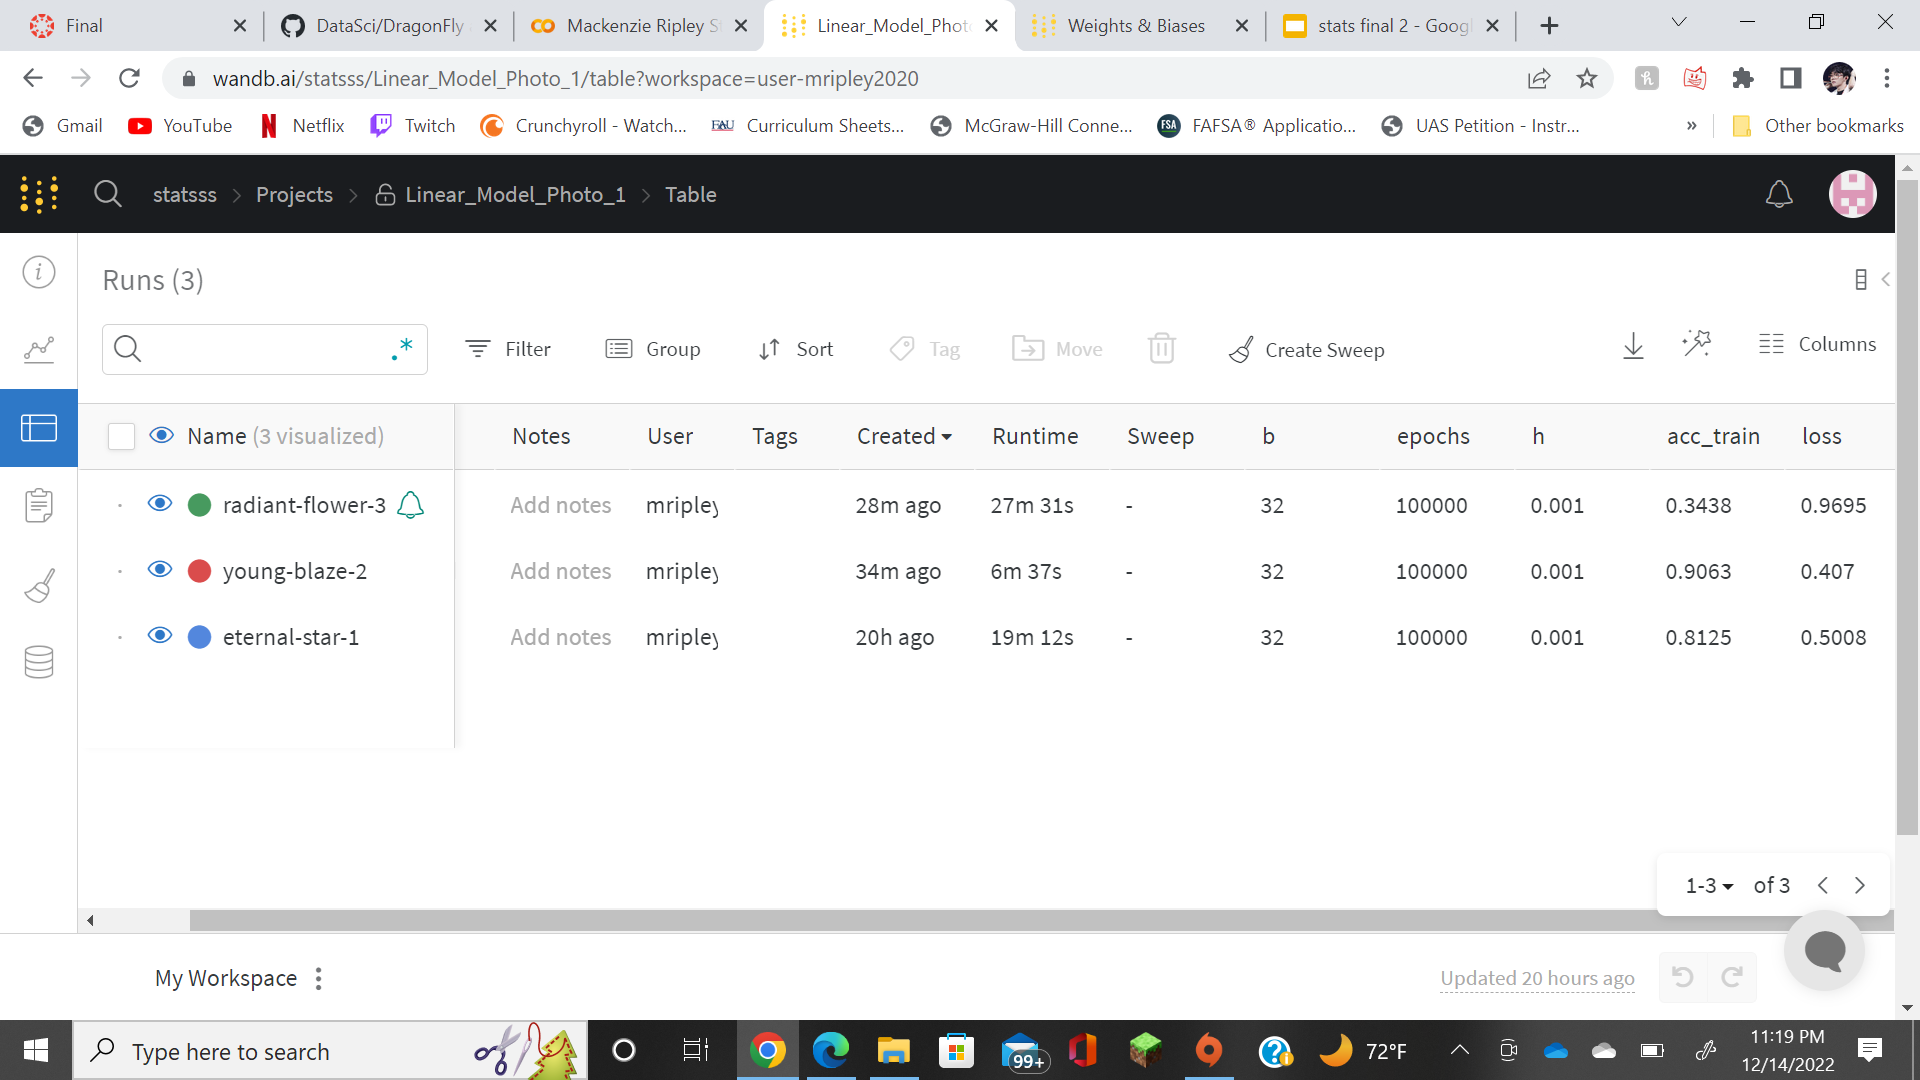

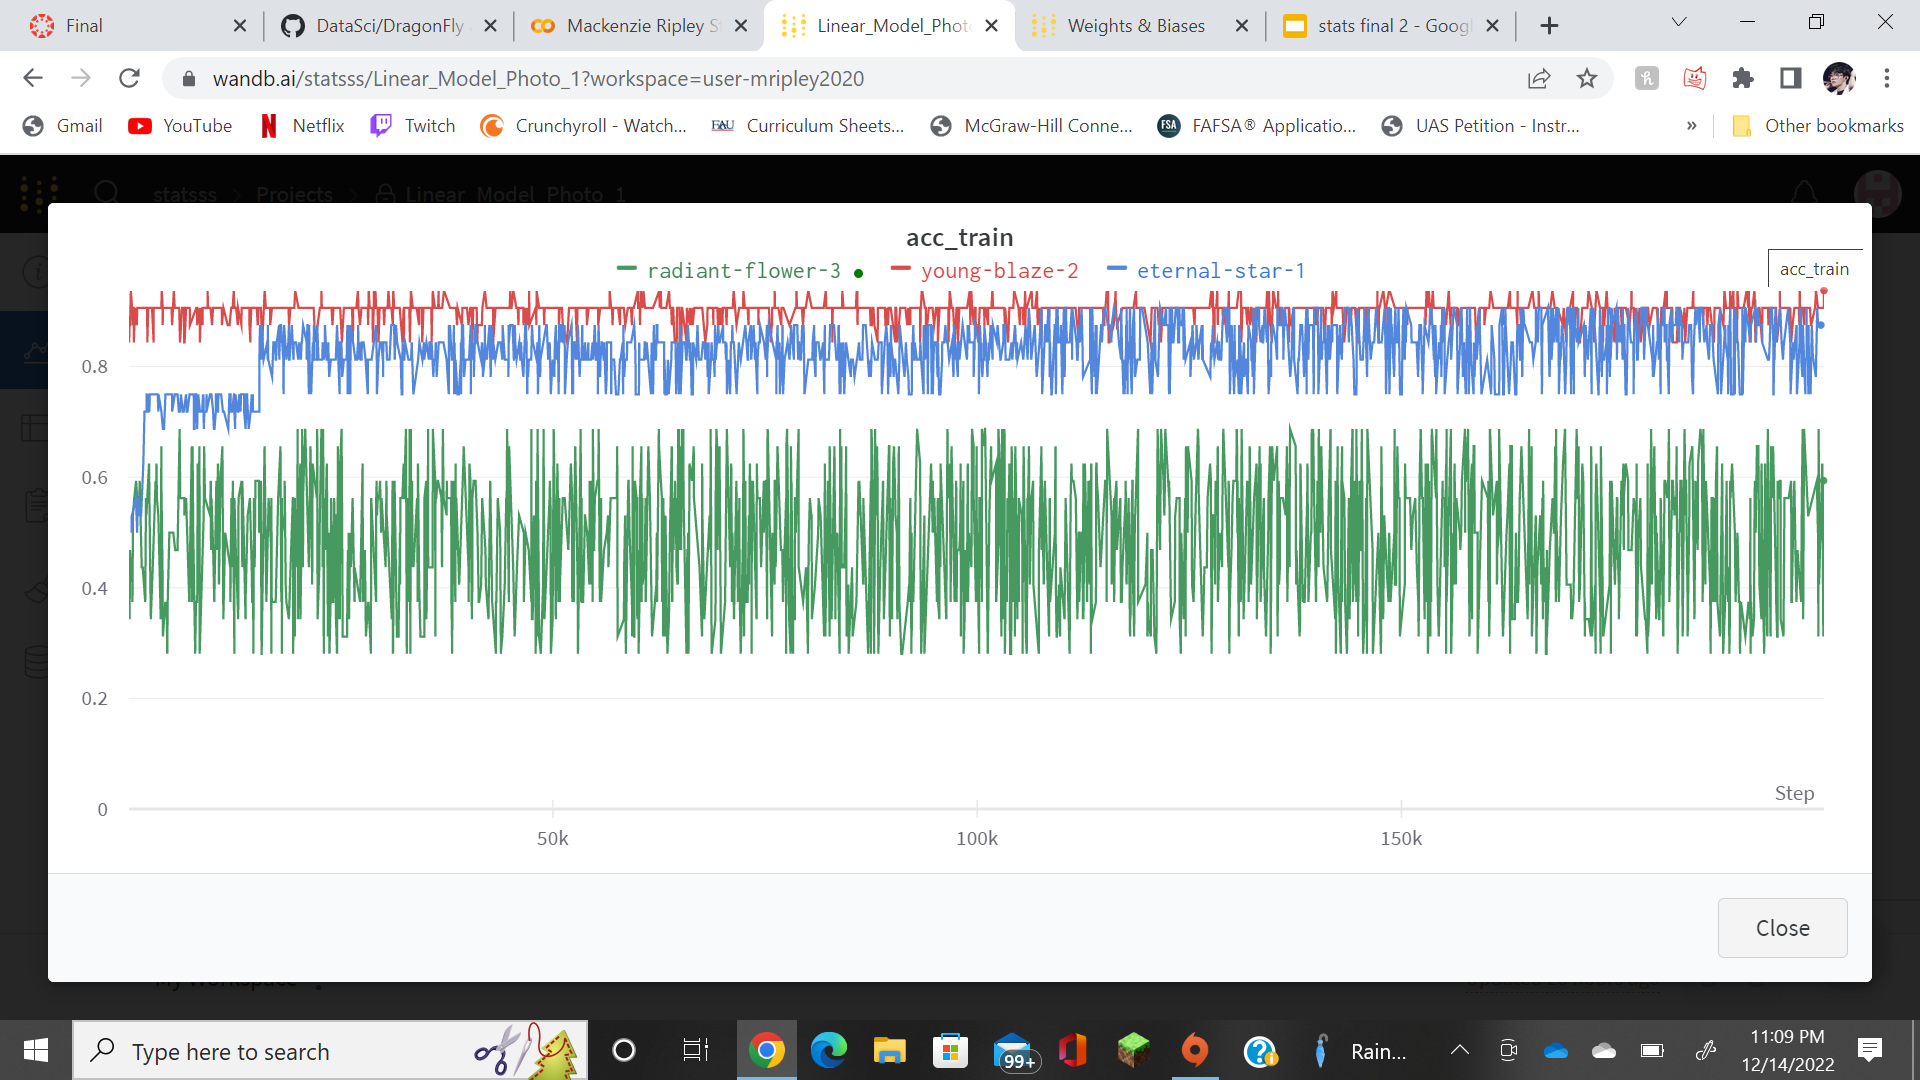

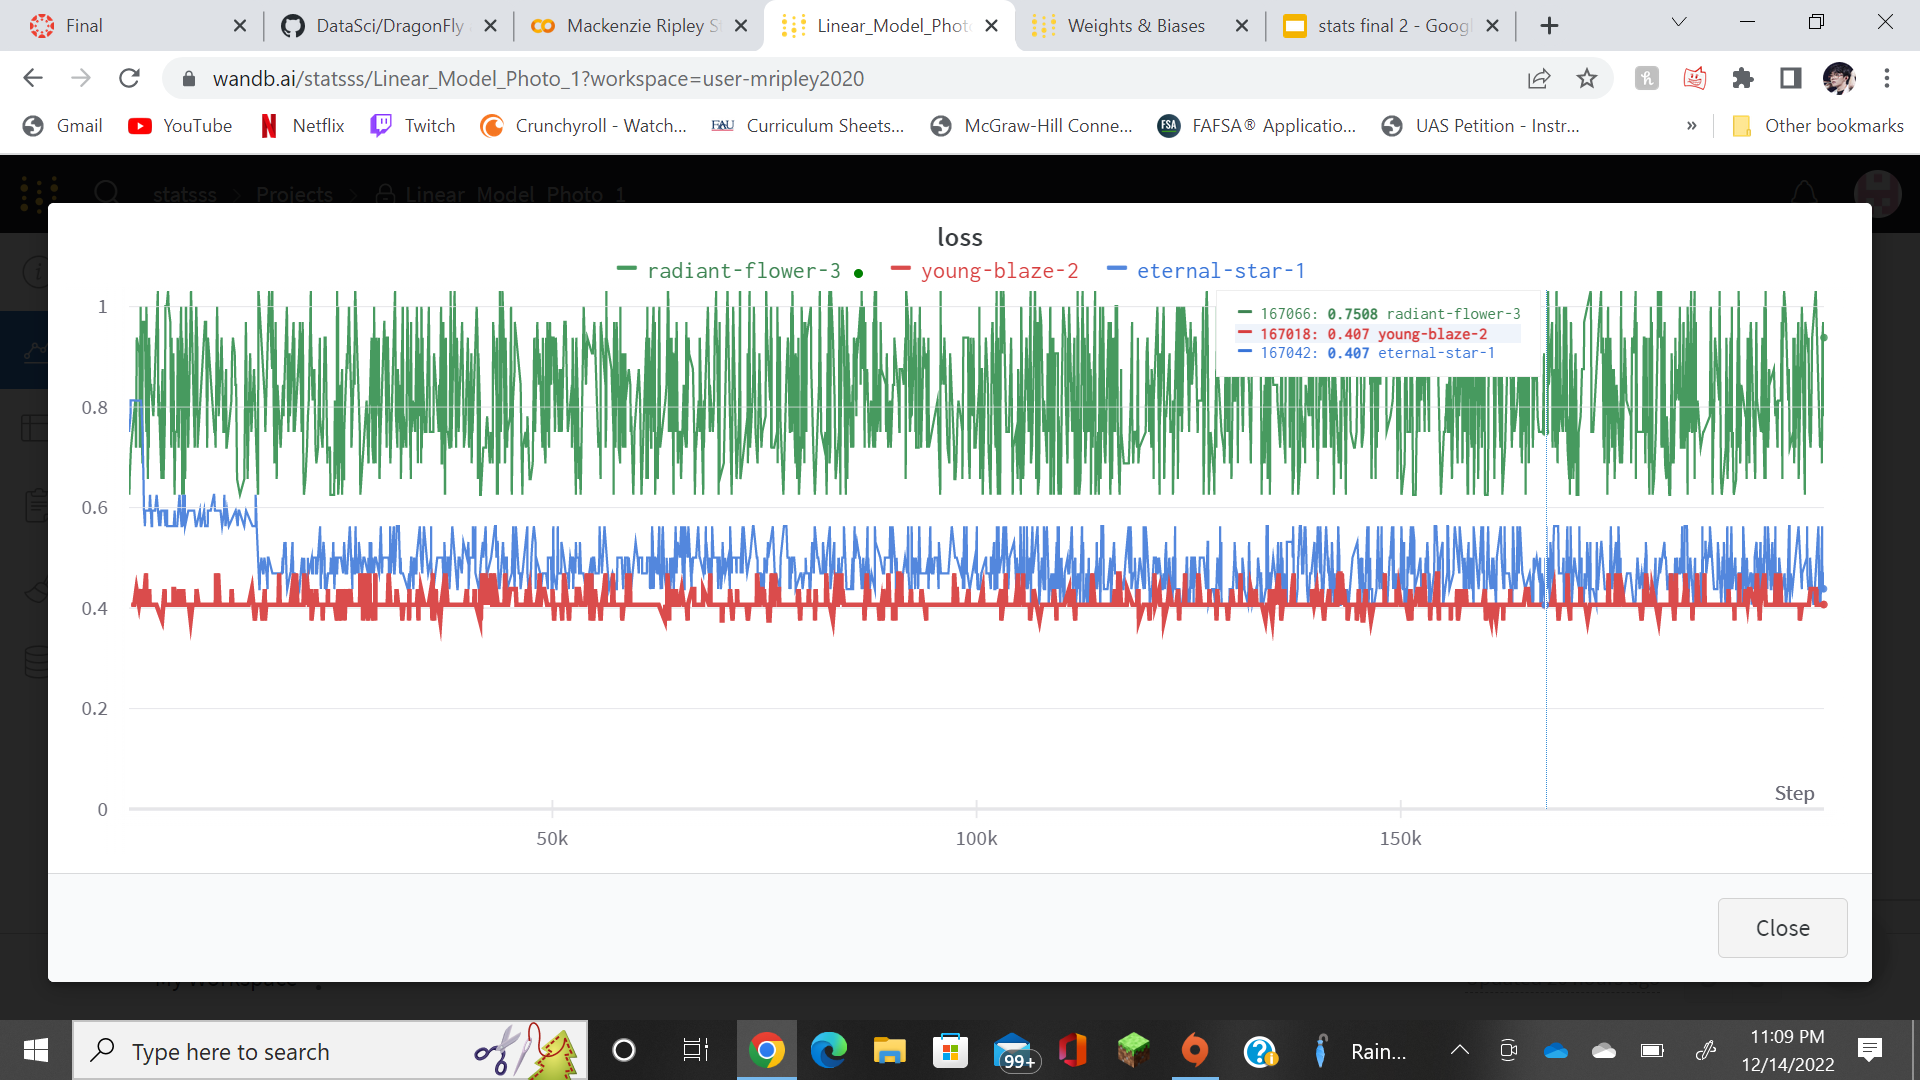

https://wandb.ai/statsss/Linear_Model_Photo_1?workspace=user-mripley2020
